## Data Profiling e Qualidade dos Dados (Data Cleaning)
Antes de começarmos a trabalhar com os dados, precisamos entendê-los. O data profiling é como uma "radiografia" dos nossos dados: identifica valores faltantes, padrões de distribuição e outliers. Esses problemas precisam ser corrigidos para garantir que as análises posteriores sejam precisas e os algoritmos consigam processar os dados adequadamente.

Conceitos:

Dados faltantes: Qual é o impacto de um valor faltante? Ignorá-los ou tratá-los manualmente?
Dados ruidosos: Como identificar erros e distorções que podem afetar a análise?

In [4]:
import pandas as pd
import numpy as np

# Dataset com dados faltantes e ruídos
data = {
    'idade': [25, 30, np.nan, 22, 40, 58, np.nan, 27, 33, 29],
    'salario': [50000, 60000, 58000, 52000, np.nan, 120000, 85000, 48000, 51000, np.nan]
}
df = pd.DataFrame(data)
df.head(10)

,idade,salario
0,25.0,50000.0
1,30.0,60000.0
2,NaN,58000.0
3,22.0,52000.0
4,40.0,NaN
5,58.0,120000.0
6,NaN,85000.0
7,27.0,48000.0
8,33.0,51000.0
9,29.0,NaN


In [12]:
# Verificando valores faltantes

df.isnull()

,idade,salario
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True
5,False,False
6,True,False
7,False,False
8,False,False
9,False,True


In [13]:
# Substituindo dados faltantes pela média
df['idade'].fillna(df['idade'].mean(), inplace=True)
df['salario'].fillna(df['salario'].mean(), inplace=True)
df.head(10)

C:\Users\karin\AppData\Local\Temp\ipykernel_9928\1178737840.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['idade'].fillna(df['idade'].mean(), inplace=True)
C:\Users\karin\AppData\Local\Temp\ipykernel_9928\1178737840.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

,idade,salario
0,25.0,50000.0
1,30.0,60000.0
2,33.0,58000.0
3,22.0,52000.0
4,40.0,65500.0
5,58.0,120000.0
6,33.0,85000.0
7,27.0,48000.0
8,33.0,51000.0
9,29.0,65500.0


In [14]:
df_ffill = df.fillna(method='ffill')
df_ffill.head(10)

C:\Users\karin\AppData\Local\Temp\ipykernel_9928\3074928518.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='ffill')


,idade,salario
0,25.0,50000.0
1,30.0,60000.0
2,33.0,58000.0
3,22.0,52000.0
4,40.0,65500.0
5,58.0,120000.0
6,33.0,85000.0
7,27.0,48000.0
8,33.0,51000.0
9,29.0,65500.0


In [15]:
# Substituindo dados faltantes pela média
df['idade'].fillna(df['idade'].mean(), inplace=True)
df['salario'].fillna(df['salario'].mean(), inplace=True)
df.head(10)

C:\Users\karin\AppData\Local\Temp\ipykernel_9928\1178737840.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['idade'].fillna(df['idade'].mean(), inplace=True)
C:\Users\karin\AppData\Local\Temp\ipykernel_9928\1178737840.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

,idade,salario
0,25.0,50000.0
1,30.0,60000.0
2,33.0,58000.0
3,22.0,52000.0
4,40.0,65500.0
5,58.0,120000.0
6,33.0,85000.0
7,27.0,48000.0
8,33.0,51000.0
9,29.0,65500.0


### Detecção e Remoção de Outliers

In [18]:
# Verificando a presença de outliers
df.describe()

,idade,salario
count,10.000000,10.000000
mean,33.000000,65500.000000
std,10.110501,22050.447211
min,22.000000,48000.000000
25%,27.500000,51250.000000
50%,31.500000,59000.000000
75%,33.000000,65500.000000
max,58.000000,120000.000000


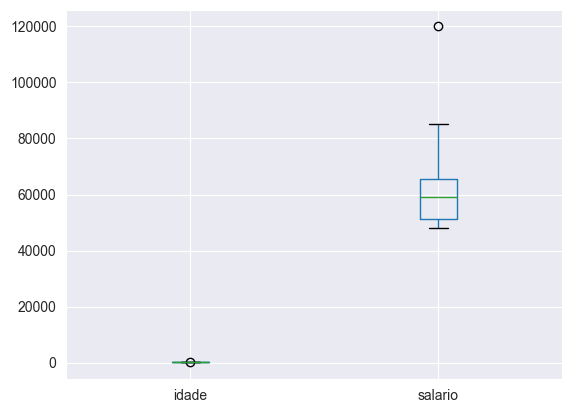

In [19]:
# Plotando para observar os outliers (opcional)
import matplotlib.pyplot as plt
df.boxplot(column=['idade', 'salario'])
plt.show()

## Exemplo de Código (IQR para Outliers)
Introdução a técnicas para identificar outliers, como o uso do z-score e IQR.

In [21]:
import numpy as np

# Dados de exemplo
data = {'age': [22, 34, 45, 23, 36, 120, 140]}
df = pd.DataFrame(data)

# Calculando IQR
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Removendo outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_outliers_removed = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

print("Dados sem outliers:\n", df_outliers_removed)

Dados sem outliers:
    age
0   22
1   34
2   45
3   23
4   36
5  120
6  140


In [22]:
# Calculando IQR
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

print('Q1: ', Q1)
print('Q3: ', Q3)
print('IQR: ', IQR)

Q1:  28.5
Q3:  82.5
IQR:  54.0


In [24]:
# Removendo outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

concao_pesquisa = (df['age'] >= lower_bound) & (df['age'] <= upper_bound)

# executa a remoção 
df_outliers_removed = df[concao_pesquisa] # << --- passar a condição de pesquisa

df_outliers_removed.head()

,age
0,22
1,34
2,45
3,23
4,36


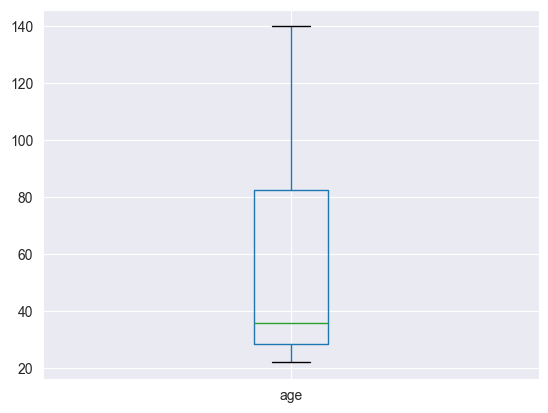

In [25]:
# Plotando para observar os outliers (opcional)
import matplotlib.pyplot as plt
df.boxplot(column=['age'])
plt.show()

### Exercício 1:

In [49]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np

# Criar o DataFrame com os dados fornecidos
data = {'salary': [50000, 62000, 83000, 45000, 1200000]}
df = pd.DataFrame(data)

In [50]:
# Exibir o DataFrame original
display(df)

,salary
0,50000
1,62000
2,83000
3,45000
4,1200000


In [62]:
# Calcular o z-score para a coluna 'salary'
df['z_score'] = stats.zscore(df['salary'])

# Exibir o DataFrame com o z-score calculado
display(df)

,salary,z_score
0,50000,-0.521715
1,62000,-0.495410
2,83000,-0.449376
3,45000,-0.532675
4,1200000,1.999175


In [63]:


# Definir um limiar para z-score
threshold = 3

# Filtrar os dados removendo os outliers
df_no_outliers = df[np.abs(df['z_score']) < threshold]

# Remover a coluna de z_score do DataFrame final
df_no_outliers = df_no_outliers.drop(columns=['z_score'])

# Exibir o DataFrame sem outliers
display(df_no_outliers)

,salary
0,50000
1,62000
2,83000
3,45000
4,1200000


In [59]:
# Exercício: Identifique e remova outliers no conjunto de dados abaixo usando o z-score.
data = {'salary': [50000, 62000, 83000, 45000, 1200000]}
df = pd.DataFrame(data)

# Tarefa: Use o z-score para detectar outliers e remover do conjunto.

# Calculando IQR
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1

print('Q1: ', Q1)
print('Q3: ', Q3)
print('IQR: ', IQR)

# Removendo outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

concao_pesquisa = (df['salary'] >= lower_bound) & (df['salary'] <= upper_bound)

# executa a remoção 
df_outliers_removed = df[concao_pesquisa] # << --- passar a condição de pesquisa

df_outliers_removed.head()

Q1:  50000.0
Q3:  83000.0
IQR:  33000.0


,salary
0,50000
1,62000
2,83000
3,45000


In [64]:
from scipy import stats

# Calculando o z-score
z_scores = np.abs(stats.zscore(df['salary']))
df_outliers_removed = df[(z_scores < 3)]

df_outliers_removed

,salary,z_score
0,50000,-0.521715
1,62000,-0.495410
2,83000,-0.449376
3,45000,-0.532675
4,1200000,1.999175


## Exercício Titanic
Link: https://www.kaggle.com/competitions/titanic/data

In [14]:
# Ler dados do arquivo CSV para um DataFrame pandas
file_path = 'C:/Users/karin/OneDrive/Área de Trabalho/data science/titanic/train.csv'
df_titanic = pd.read_csv(file_path)

df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
df_titanic.shape

(891, 12)

In [15]:
# Exibindo valores ausentes
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
df_titanic[df_titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [17]:
df_titanic.groupby('Embarked')['PassengerId'].count()

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

In [18]:
df_titanic.groupby('Embarked')['PassengerId'].count()

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

In [19]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df_titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
694,695,0,1,"Weir, Col. John",male,60.0,0,0,113800,26.5500,NaN,S
788,789,1,3,"Dean, Master. Bertram Vere",male,1.0,1,2,C.A. 2315,20.5750,NaN,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,NaN,S
422,423,0,3,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S
833,834,0,3,"Augustsson, Mr. Albert",male,23.0,0,0,347468,7.8542,NaN,S


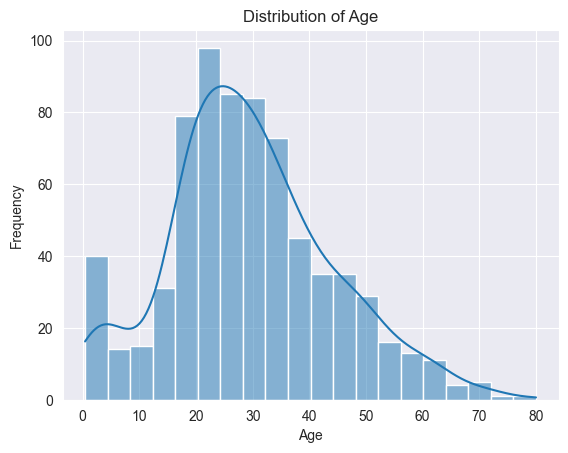

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a histogram for 'Age' in the Pandas DataFrame 'df_titanic'
sns.histplot(df_titanic['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

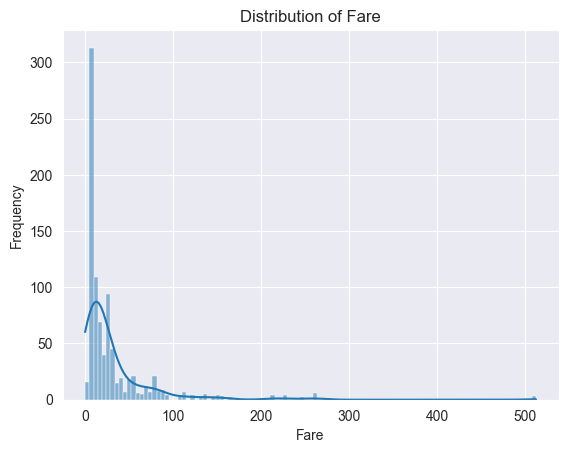

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a histogram for 'Age' in the Pandas DataFrame 'df_titanic'
sns.histplot(df_titanic['Fare'], kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [25]:
import numpy as np

# Gerando 177 valores aleatórios respeitando a distribuição da coluna 'Age' do DataFrame 'df_titanic'
age_distribution = df_titanic['Age'].dropna()
random_ages = np.random.choice(age_distribution, 177, replace=True)

random_ages

array([32.  , 34.  , 26.  , 36.  , 27.  , 18.  , 47.  , 15.  , 42.  ,
       23.  , 20.5 , 70.5 , 45.  , 35.  , 36.  , 16.  , 17.  , 49.  ,
        0.83, 35.  , 31.  , 65.  , 34.  , 36.  , 30.  , 20.  , 29.  ,
       25.  , 35.  ,  8.  , 30.  , 28.  , 36.  , 35.  , 54.  ,  2.  ,
       21.  ,  9.  , 64.  , 36.5 , 28.5 , 23.  , 18.  ,  7.  ,  1.  ,
       34.  , 17.  , 22.  , 33.  , 56.  , 25.  , 49.  , 64.  , 34.  ,
        5.  , 37.  , 18.  ,  0.83, 17.  , 54.  , 30.  , 33.  , 34.  ,
        7.  , 44.  , 29.  , 42.  , 23.  , 39.  , 28.  , 22.  , 13.  ,
       19.  , 71.  , 34.  , 63.  , 16.  , 29.  , 30.  , 57.  , 39.  ,
       29.  , 40.  , 25.  , 32.  , 24.5 , 34.  , 50.  , 30.  , 30.  ,
       28.  , 30.  ,  2.  , 26.  , 42.  , 17.  ,  4.  , 32.  , 51.  ,
       19.  , 19.  , 25.  , 32.  , 36.  , 20.  , 29.  , 33.  ,  9.  ,
        6.  , 48.  , 39.  , 19.  , 31.  , 38.  , 16.  , 27.  , 20.  ,
        0.83, 59.  , 24.  , 16.  , 38.  , 16.  , 12.  , 21.  , 26.  ,
       40.  , 20.  ,